# Homework 4 (Dev Mody)
## Exercise 4 (Principle Component Analysis)

In this exercise, we shall try to reproduce the results shown in Figure 8.7 from Example 8.4 in the textbook. We shall use the dataset `2d_span_data.csv` along with the code on Page 218-219 as follows:
```python
# center an input dataset X
def center(X):
    X_means = np.mean(X,axis=1)[:,np.newaxis]
    X_centered = X - X_means
    return X_centered

# function for computing principal components of input dataset X
def compute_pcs(X,lam):
    # create the data covariance matrix
    P = float(X.shape[1])
    Cov = 1/P*np.dot(X,X.T) + lam*np.eye(X.shape[0])
    # use numpy function to compute eigenvectors / eigenvalues D,V = np.linalg.eigh(Cov)
    return D,V

X_original = np.loadtxt(datapath + '2d_span_data.csv',delimiter=',')
```

### Exercise 4.1
Import the dataset and use `def center(X)` to first center the data and then `def compute_pcs(X,lam)` to compute the principal components. Finally reproduce Fig 8.7

ANSWER: The Implementation for the above functions is as follows:


In [2]:
# install github clone - allows for easy cloning of subdirectories
!pip install github-clone
from pathlib import Path 

# clone datasets
if not Path('chapter_8_datasets').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_datasets
else:
    print('chapter_8_datasets already cloned!')

# clone library subdirectory
if not Path('chapter_8_library').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_library
else:
    print('chapter_8_library already cloned!')

# clone images
if not Path('chapter_8_images').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_images
else:
    print('chapter_8_images already cloned!')

# clone videos
if not Path('chapter_8_videos').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_videos
else:
    print('chapter_8_videos already cloned!')

## run universally whether in collab or local ##
# append path for local library, data, and image import
import sys
sys.path.append('./chapter_8_library') 
sys.path.append('./chapter_8_images') 
sys.path.append('./chapter_8_datasets') 

# import section helper
import section_8_3_helpers

# dataset paths
dataset_path_1 = 'chapter_8_datasets/2d_span_data.csv'
dataset_path_2 = 'chapter_8_datasets/3d_span_data.csv'

# image paths
image_path_1 = "chapter_8_images/pca_classic.png"
image_path_2 = "chapter_8_images/Fig_9_7.png"

# standard imports
import matplotlib.pyplot as plt
from IPython.display import Image
import autograd.numpy as np
from matplotlib import gridspec

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

chapter_8_datasets already cloned!
chapter_8_library already cloned!
chapter_8_images already cloned!
chapter_8_videos already cloned!


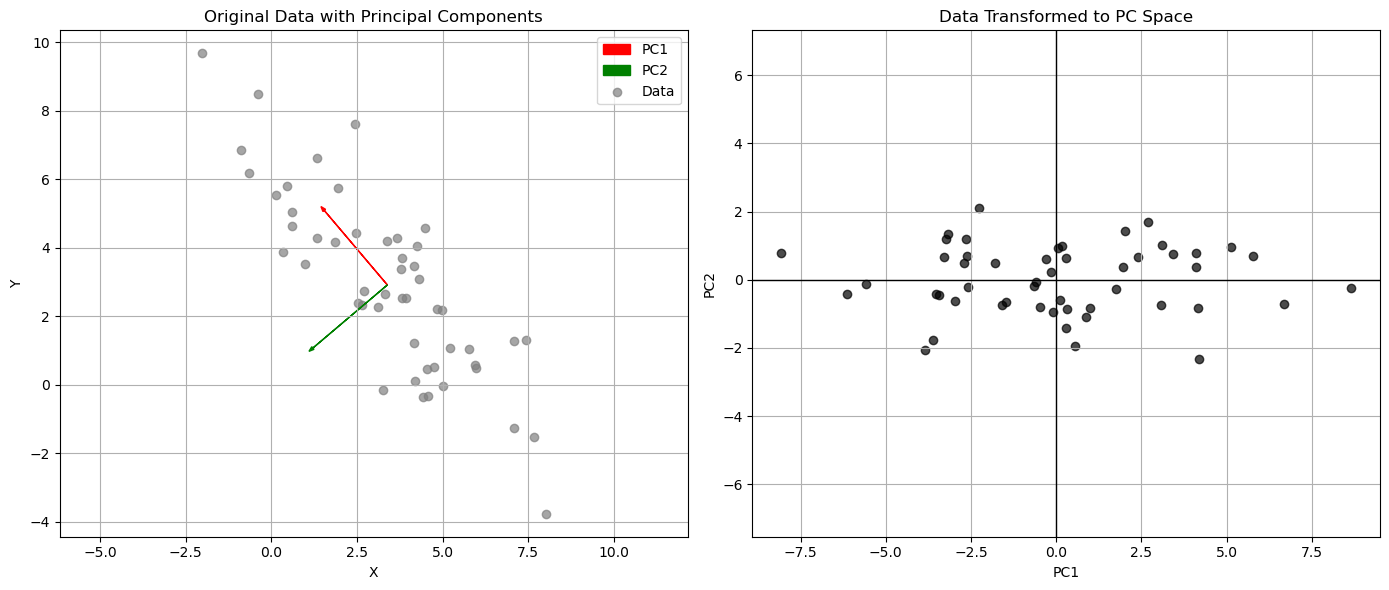

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import section_8_3_helpers as helpers

# Define the path to the dataset
data_file_path = '2d_span_data.csv'

# Center an input dataset
def center_data(data):
    data_means = np.mean(data, axis=1)[:, np.newaxis]
    data_centered = data - data_means
    return data_centered

# Function for computing principal components
def calculate_principal_components(data, regularization=0.1):
    num_points = float(data.shape[1])
    covariance_matrix = (1/num_points * np.dot(data, data.T) + 
                        regularization * np.eye(data.shape[0]))
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort in descending order
    sort_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sort_indices]
    sorted_eigenvectors = eigenvectors[:, sort_indices]
    return sorted_eigenvalues, sorted_eigenvectors

# Load and process data
input_data = np.loadtxt('2d_span_data.csv', delimiter=',')
centered_data = center_data(input_data)
eigenvalues, eigenvectors = calculate_principal_components(centered_data, 1e-5)
transformed_data = np.dot(eigenvectors.T, centered_data)
dataset_mean = np.mean(input_data, axis=1)

# Create visualization
figure, axes_array = plt.subplots(1, 2, figsize=(14, 6))

# Original data plot
original_plot = axes_array[0]
original_plot.scatter(input_data[0, :], input_data[1, :], 
                     color='gray', alpha=0.7, label='Data')
arrow_length = 3.0
arrow_colors = ['r', 'g']

for component_idx in range(2):
    principal_component = eigenvectors[:, component_idx]
    original_plot.arrow(dataset_mean[0], dataset_mean[1],
                       arrow_length * principal_component[0],
                       arrow_length * principal_component[1],
                       color=arrow_colors[component_idx],
                       head_width=0.1, length_includes_head=True,
                       label=f'PC{component_idx+1}')
original_plot.set_title("Original Data with Principal Components")
original_plot.set_xlabel("X")
original_plot.set_ylabel("Y")
original_plot.axis('equal')
original_plot.legend()
original_plot.grid(True)

# Transformed data plot
transformed_plot = axes_array[1]
transformed_plot.scatter(transformed_data[0, :], transformed_data[1, :], 
                        color='black', alpha=0.7)
transformed_plot.axhline(0, color='black', linewidth=1)
transformed_plot.axvline(0, color='black', linewidth=1)
transformed_plot.set_title("Data Transformed to PC Space")
transformed_plot.set_xlabel("PC1")
transformed_plot.set_ylabel("PC2")
transformed_plot.axis('equal')
transformed_plot.grid(True)

plt.tight_layout()
plt.show()